# Proyecto Final: Sesión 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

r_cols = ['user_id', 'movie_id', 'rating']  
ratings = pd.read_csv("dataset_unido/u.data", sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']  
movies = pd.read_csv('dataset_unido/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

# combinamos ambos datasets para tener el  
ratings = pd.merge(movies, ratings)

# Pivotamos la tabla para que la matriz tenga : fila por usuario y columna por pelicula
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')  
movieRatings.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = movieRatings.fillna(0)
df.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Diagrama de barras

Diagrama de barras simple, en este caso puntuaciones de una sola película.

Text(0, 0.5, 'Frecuency')

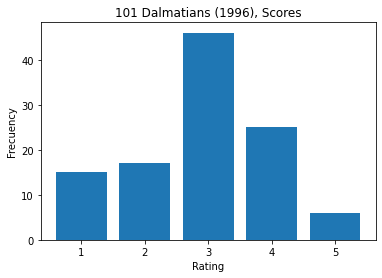

In [3]:
# Diagrama de barras

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = movieRatings['101 Dalmatians (1996)'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('101 Dalmatians (1996), Scores') 
ax.set_xlabel('Rating') 
ax.set_ylabel('Frecuency')

Diagrama de barras múltiple. Creamos una función que compara las puntuaciones de dos películas

In [4]:
def comparacion_puntuaciones(title1, title2):
    # create a figure and axis 
    fig, axs = plt.subplots(1, 2, figsize=[12.0, 5.8])

    # count the occurrence of each class 
    data = movieRatings[title1].value_counts() 
    # get x and y data 
    points = data.index 
    frequency = data.values 
    # create bar chart 
    axs[0].bar(points, frequency) 
    # set title and labels 
    axs[0].set_title('{}, Scores'.format(title1)) 
    axs[0].set_xlabel('Rating') 
    axs[0].set_ylabel('Frecuency')

    # count the occurrence of each class 
    data = movieRatings[title2].value_counts() 
    # get x and y data 
    points = data.index 
    frequency = data.values 
    # create bar chart 
    axs[1].bar(points, frequency) 
    # set title and labels 
    axs[1].set_title('{}, Scores'.format(title2)) 
    axs[1].set_xlabel('Rating') 
    axs[1].set_ylabel('Frecuency')

    fig.suptitle('Comparacion')
    plt.show()

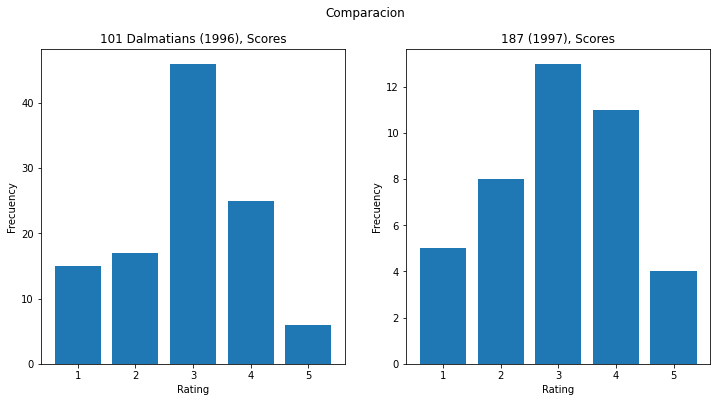

In [5]:
comparacion_puntuaciones(title1 = '101 Dalmatians (1996)', title2 = '187 (1997)')

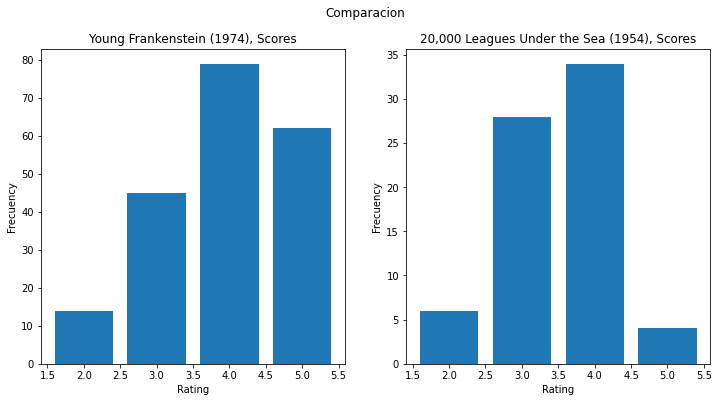

In [6]:
comparacion_puntuaciones(title1 = 'Young Frankenstein (1974)', title2 = '20,000 Leagues Under the Sea (1954)')

Podemos solaparlos en uno solo para una mejor comparación:

In [7]:
def comparacion_puntuaciones_en_uno(title1, title2):
    # create a figure and axis 
    fig, axs = plt.subplots(1, 1, figsize=[12.0, 5.8])

    # count the occurrence of each class 
    data = movieRatings[title1].value_counts() 
    # get x and y data 
    points = data.index 
    frequency = data.values 
    # create bar chart 
    axs.bar(points, frequency, label='{}'.format(title1)) 
    # set title and labels 
    axs.set_title('{} and {}, Scores'.format(title1, title2)) 
    axs.set_xlabel('Rating') 
    axs.set_ylabel('Frecuency')

    # count the occurrence of each class 
    data = movieRatings[title2].value_counts() 
    # get x and y data 
    points = data.index 
    frequency = data.values 
    # create bar chart 
    axs.bar(points, frequency, label='{}'.format(title2)) 
    # set title and labels
    axs.legend()
    
    fig.suptitle('Comparacion')
    plt.show()

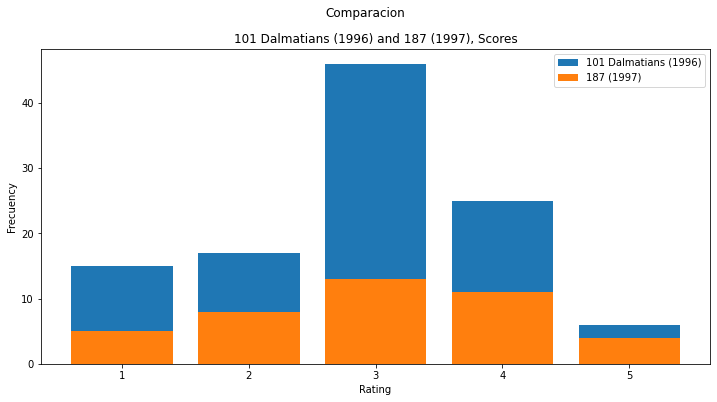

In [8]:
comparacion_puntuaciones_en_uno(title1 = '101 Dalmatians (1996)', title2 = '187 (1997)')

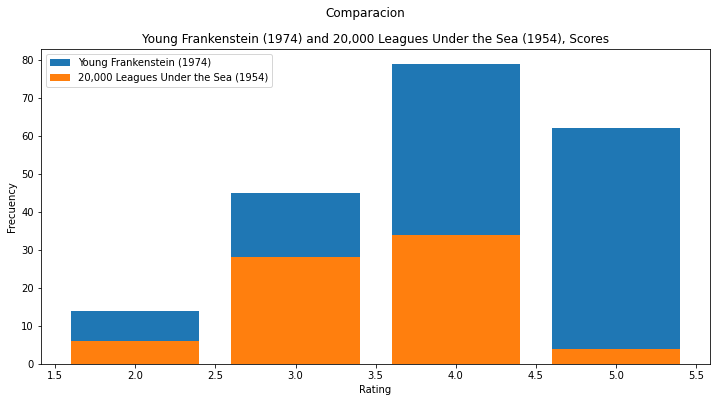

In [56]:
comparacion_puntuaciones_en_uno(title1 = 'Young Frankenstein (1974)', title2 = '20,000 Leagues Under the Sea (1954)')

## Usamos Bokeh

Representamos un gráfico de barras junto a su función de acumulación.

In [91]:
# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# My word count data
day_num = np.linspace(1, 5, 5)
data = movieRatings['101 Dalmatians (1996)'].value_counts()
acumulativo = []
for i in data.index:
    acumulativo.append(data.values[int(i-1)])

# Output the visualization directly in the notebook
output_notebook()

# Create a figure with a datetime type x-axis
fig = figure(title='101 Dalmatians (1996)',
             plot_height=400, plot_width=700,
             x_axis_label='Rating', y_axis_label='Frecuency',
             x_minor_ticks=2, y_range=(0, 150),
             toolbar_location=None)

# The daily words will be represented as vertical bars (columns)
fig.vbar(x=data.index, bottom=0, top=data.values, 
         color='blue', width=0.75, 
         legend_label='Rating')

# The cumulative sum will be a trend line
fig.line(x=np.arange(1, 6), y=np.cumsum(acumulativo), 
         color='gray', line_width=1,
         legend_label='Frecuencia acumulada')

# Put the legend in the upper left corner
fig.legend.location = 'top_left'

# Let's check it out
show(fig)


Loading BokehJS ...